# 1. Relationship between person with organizations

The node with the highest degree is: Council on Foreign Relations with a degree of 238


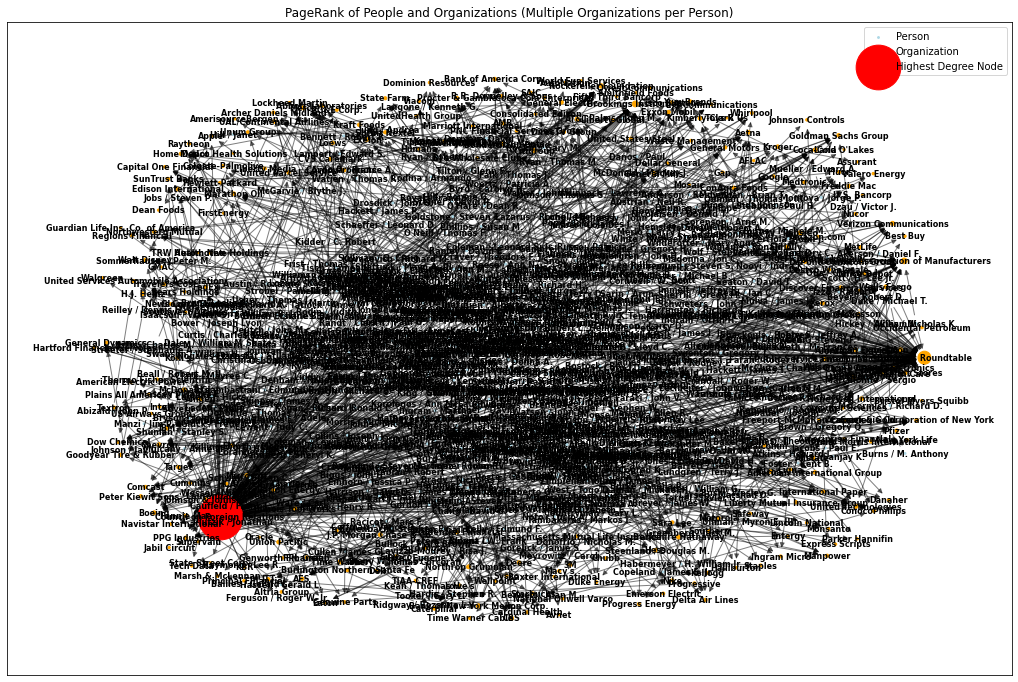

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# load file
file_path = 'people.txt'
data = pd.read_csv(file_path, delimiter='\t')

# one people with more organizations
person_count = data['person'].value_counts()
multiple_orgs = person_count[person_count > 1].index
data_subset = data[data['person'].isin(multiple_orgs)]

# create graph
G = nx.DiGraph()

# add node and edge
for index, row in data_subset.iterrows():
    person = row['person']
    organization = row['organization']
    G.add_node(person, type='person')
    G.add_node(organization, type='organization')
    G.add_edge(person, organization)

# PageRank
pagerank = nx.pagerank(G)

person_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'person']
organization_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'organization']

# find biggest degree
degree_dict = dict(G.degree(G.nodes()))
max_degree_node = max(degree_dict, key=degree_dict.get)
max_degree_value = degree_dict[max_degree_node]

print(f"The node with the highest degree is: {max_degree_node} with a degree of {max_degree_value}")

# draw graph
plt.figure(figsize=(18, 12))
pos = nx.spring_layout(G, k=0.1, iterations=20)

# draw person node
nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_size=[pagerank[n] * 5000 for n in person_nodes], node_color='lightblue', label='Person')
# draw organization node
nx.draw_networkx_nodes(G, pos, nodelist=organization_nodes, node_size=[pagerank[n] * 5000 for n in organization_nodes], node_color='orange', label='Organization')
# highlight biggest degree
nx.draw_networkx_nodes(G, pos, nodelist=[max_degree_node], node_size=2000, node_color='red', label='Highest Degree Node')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), alpha=0.5)

# add label
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
filename2='whole.png'

plt.legend(scatterpoints=1)
plt.title('PageRank of People and Organizations (Multiple Organizations per Person)')
plt.savefig(filename2) 
plt.show()

# 2. Top 10 people and their organizations

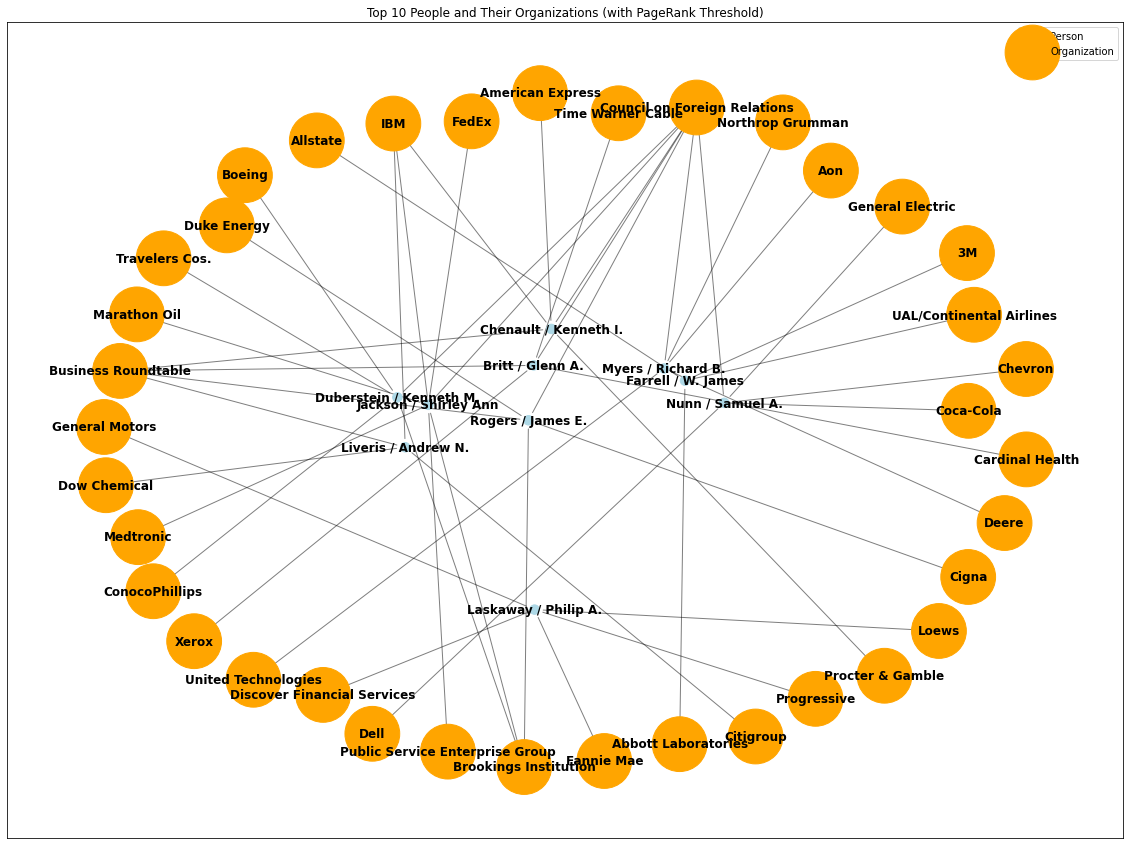

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt



file_path = 'people.txt'
data = pd.read_csv(file_path, delimiter='\t')


person_count = data['person'].value_counts()

top_people_by_orgs = person_count.head(10)
top_people_list = top_people_by_orgs.index.tolist()


data_subset = data[data['person'].isin(top_people_list)]


G = nx.DiGraph()

for index, row in data_subset.iterrows():
    person = row['person']
    organization = row['organization']
    G.add_node(person, type='person')
    G.add_node(organization, type='organization')
    G.add_edge(person, organization)

pagerank = nx.pagerank(G)


threshold = 0.01
person_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'person' and pagerank[n] > threshold]
organization_nodes = [n for n, attr in G.nodes(data=True) if attr['type'] == 'organization']

edges = [(u, v) for u, v in G.edges() if u in person_nodes and v in organization_nodes]

# set node size
person_node_size = [pagerank[n] * 5000 for n in person_nodes]
organization_node_size = [3000 for n in organization_nodes]

plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_size=person_node_size, node_color='lightblue', label='Person')
nx.draw_networkx_nodes(G, pos, nodelist=organization_nodes, node_size=organization_node_size, node_color='orange', label='Organization')


nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.5)

nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
filename4='top 10 people.png'

plt.legend(scatterpoints=1)
plt.title('Top 10 People and Their Organizations (with PageRank Threshold)')
plt.savefig(filename4)
plt.show()

# 3. Degree distribution

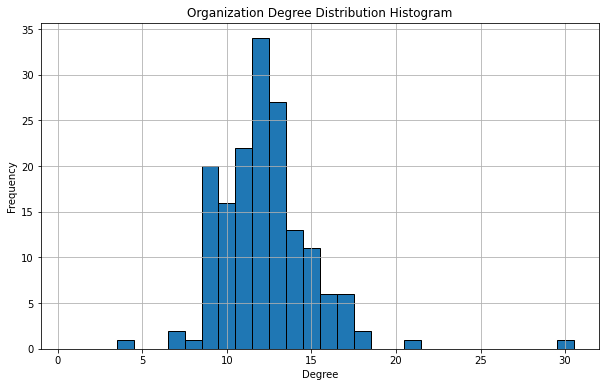

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

file_path = 'combined.txt'
# for first 2000 rows data
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', nrows=2000)  
G = nx.Graph()

for _, row in df.iterrows():
    person = row['person']
    organization = row['organization']
    G.add_node(person, bipartite=0) 
    G.add_node(organization, bipartite=1)  
    G.add_edge(person, organization)

organization_degree_sequence = [d for n, d in G.degree() if G.nodes[n]['bipartite'] == 1] 


filename6='orgdistribution.png'
plt.figure(figsize=(10, 6))
plt.hist(organization_degree_sequence, bins=range(1, max(organization_degree_sequence) + 1), align='left', edgecolor='black')
plt.title("Organization Degree Distribution Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.savefig(filename6)
plt.grid(True)
plt.show()

# 4. Regression (Failed random forest)

R² Score: 0.952027709955028
Mean Absolute Error (MAE): 2.9917152953588277
Mean Squared Error (MSE): 105.94663436147889
Root Mean Squared Error (RMSE): 10.293038150200303
Cross-Validation R² Scores: [-72.20741154 -21.96344206 -16.75730629 -25.87296071 -61.65488261]
Average Cross-Validation R² Score: -39.691200642619286


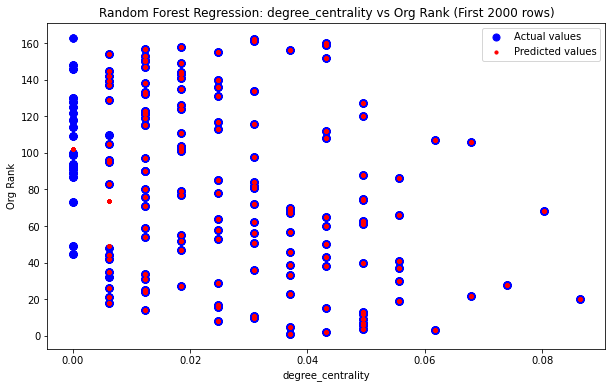

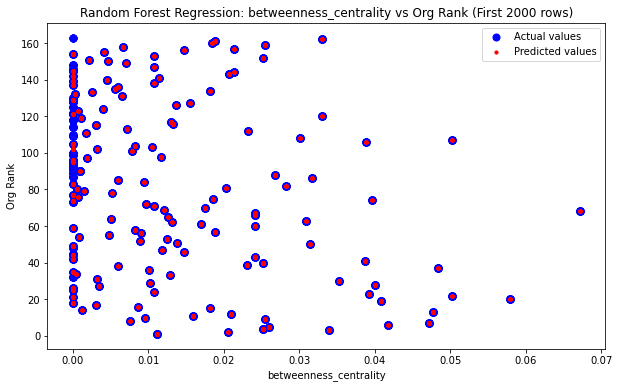

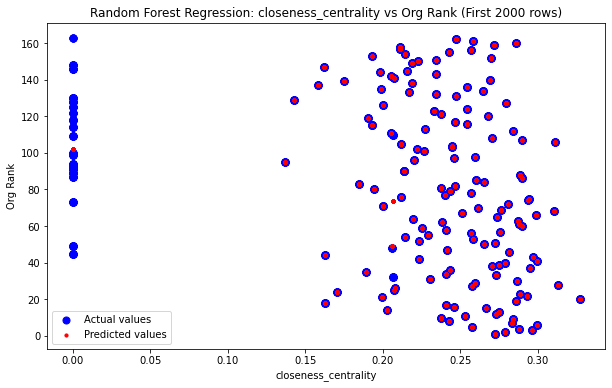

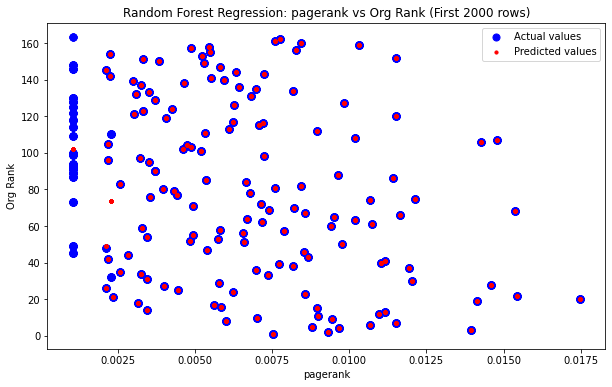

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the dataset
file_path = 'combined.txt'
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', nrows=2000)  # Only consider the first 2000 rows

# Initialize the graph
G = nx.Graph()

# Add edges associated with persons and multiple organizations
for _, row in df.iterrows():
    person = row['person']
    organization = row['organization']
    G.add_node(person, bipartite=0)  # Add person node
    G.add_node(organization, bipartite=1)  # Add organization node
    G.add_edge(person, organization)

# Project the bipartite graph to an organization graph
organizations = df['organization'].unique()
G_org = nx.bipartite.weighted_projected_graph(G, organizations)

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G_org)
betweenness_centrality = nx.betweenness_centrality(G_org)
closeness_centrality = nx.closeness_centrality(G_org)
pagerank = nx.pagerank(G_org)

# Convert centrality dictionaries to DataFrame
centrality_df = pd.DataFrame({
    'organization': list(G_org.nodes),
    'degree_centrality': [degree_centrality[node] for node in G_org.nodes],
    'betweenness_centrality': [betweenness_centrality[node] for node in G_org.nodes],
    'closeness_centrality': [closeness_centrality[node] for node in G_org.nodes],
    'pagerank': [pagerank[node] for node in G_org.nodes]
})

# Merge centrality data with the original data
df = df.merge(centrality_df, on='organization')

# Extract feature matrix X and target variable y
X = df[['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']].values
y = df['org_rank'].values

# Standardize the feature matrix X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train a random forest regression model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_scaled, y)

# Make predictions and calculate R² value
y_pred = rf_reg.predict(X_scaled)
r_squared = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
# MSE is the mean of the squared differences between predicted and actual values. A higher MSE indicates a greater disparity between the predicted and actual values.
print(f"Root Mean Squared Error (RMSE): {rmse}")
# RMSE is the square root of MSE, representing the average difference between predicted and actual values. An RMSE of 10.29 means the predictions differ from actual values by an average of about 10 units.

# Cross-validation
cv_scores = cross_val_score(rf_reg, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average Cross-Validation R² Score: {np.mean(cv_scores)}")
# Cross-validation R² values assess the model's generalization ability. Low or even negative cross-validation R² values indicate poor performance on the test set, demonstrating inadequate generalization.
# Negative R² value: A negative value means the model performs worse than a baseline model (like a simple average prediction). This usually implies overfitting on the test set.

# Plot regression results
for i, feature in enumerate(['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, i], y, color='blue', label='Actual values', s=50)
    plt.scatter(X[:, i], y_pred, color='red', label='Predicted values', s=10)
    plt.xlabel(feature)
    plt.ylabel('Org Rank')
    plt.title(f'Random Forest Regression: {feature} vs Org Rank (First 2000 rows)')
    plt.legend()
    plt.show()



# 5. Small world model

Clustering Coefficient: 0.9040724893110166


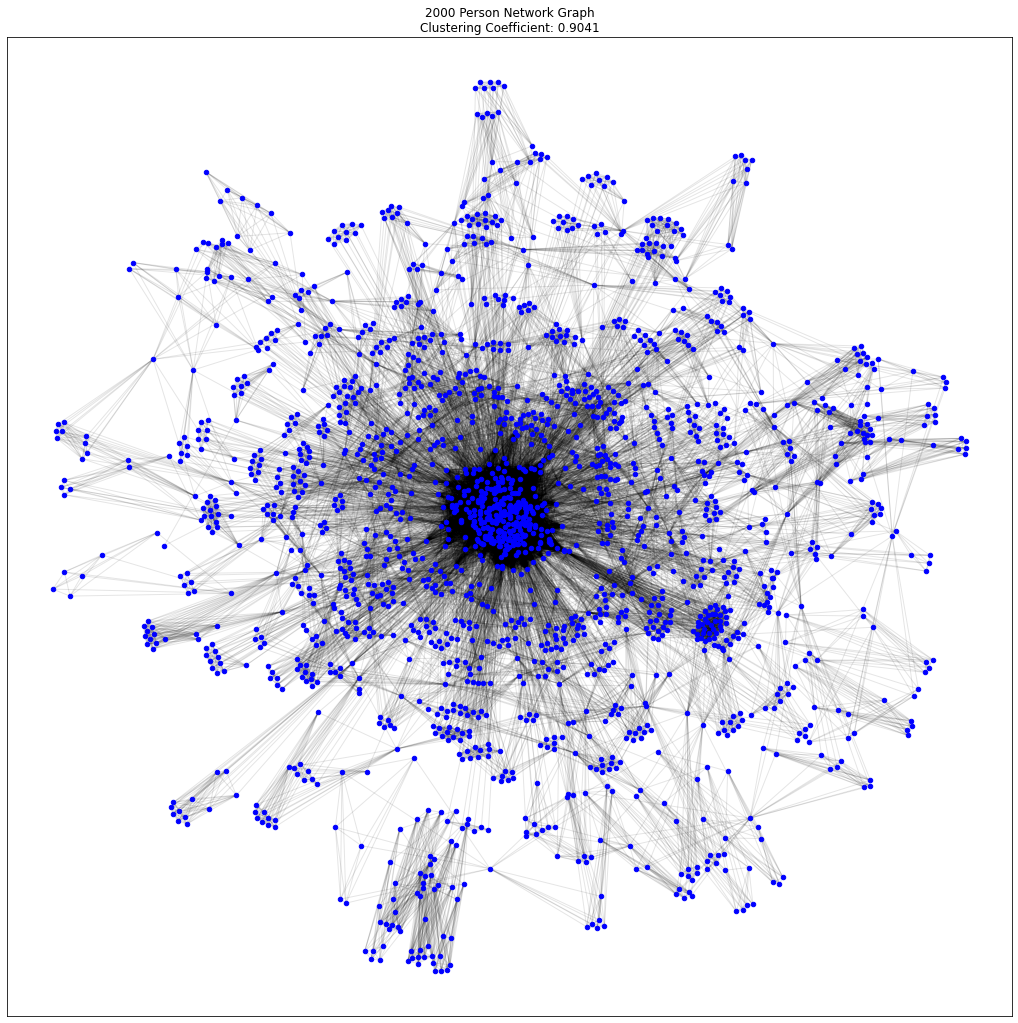

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
file_path = 'combined.txt'  
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# Only consider data for the first 2000 persons
df_sample = df[df['person'].isin(df['person'].unique()[:2000])]

# Create a bipartite graph
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# Add edges
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# Project the bipartite graph to a unipartite graph (only person nodes)
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Draw the network graph
filename2000 = '2000personng.png'
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(persons_graph, k=0.15, iterations=50)
nx.draw_networkx_nodes(persons_graph, pos, node_size=20, node_color='blue')
nx.draw_networkx_edges(persons_graph, pos, alpha=0.1)
plt.title(f"2000 Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.savefig(filename2000)
plt.show()


## 5.1 calculating short path

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
file_path = 'combined.txt'
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# Only consider data for the first 2000 persons
df_sample = df[df['person'].isin(df['person'].unique()[:2000])]

# Create a bipartite graph
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# Add edges
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# Project the bipartite graph to a unipartite graph (only including person nodes)
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Calculate average shortest path length
if nx.is_connected(persons_graph):
    average_shortest_path_length = nx.average_shortest_path_length(persons_graph)
    print(f"Average Shortest Path Length: {average_shortest_path_length}")
else:
    # If the graph is not connected, calculate the average shortest path length for the largest connected component
    largest_cc = max(nx.connected_components(persons_graph), key=len)
    subgraph = persons_graph.subgraph(largest_cc)
    average_shortest_path_length = nx.average_shortest_path_length(subgraph)
    print(f"Average Shortest Path Length (Largest Component): {average_shortest_path_length}")


Clustering Coefficient: 0.9040724893110166
Average Shortest Path Length (Largest Component): 3.1401739768883927


# 6. Small world of 200 people

Clustering Coefficient: 0.8538894574063951


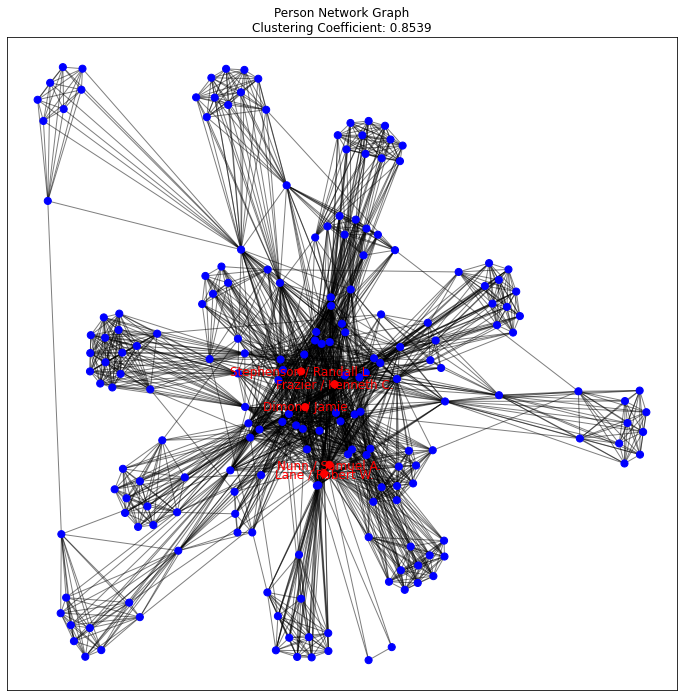

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
file_path = 'combined.txt'  # Update to the actual path of the file
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# Only consider data for the first 200 persons
df_sample = df[df['person'].isin(df['person'].unique()[:200])]

# Create a bipartite graph
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# Add edges
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# Project the bipartite graph to a unipartite graph (only including person nodes)
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Calculate degree centrality and identify central nodes
degree_centrality = nx.degree_centrality(persons_graph)
# Select the top 5 nodes with the highest degree centrality as central nodes
num_central_nodes = 5
central_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:num_central_nodes]

# Set node colors: central nodes in red, others in blue
node_colors = ['red' if node in central_nodes else 'blue' for node in persons_graph.nodes()]
filename200='200person'
# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, node_color=node_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
nx.draw_networkx_labels(persons_graph, pos, labels={node: node for node in central_nodes}, font_color='red')
plt.savefig(filename200)
plt.title(f"Person Network Graph\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


# 7. Application of community
## pip install python-louvain


Clustering Coefficient: 0.8542418780463328


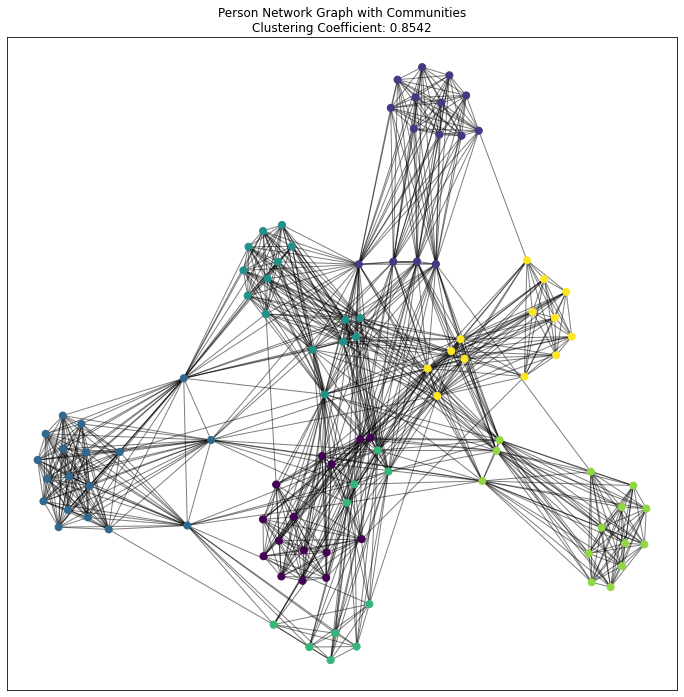

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Load data
file_path = 'combined.txt'  # Update to the actual path of the file
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# Only consider data for the first 100 persons
df_sample = df[df['person'].isin(df['person'].unique()[:100])]

# Create a bipartite graph
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# Add edges
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# Project the bipartite graph to a unipartite graph (only including person nodes)
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Detect communities using the Louvain algorithm
partition = community_louvain.best_partition(persons_graph)

# Assign a color to each node based on community
community_colors = [partition[node] for node in persons_graph.nodes()]

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, cmap=plt.get_cmap('viridis'), node_color=community_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)
plt.title(f"Person Network Graph with Communities\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


## 7.1 Remark community and print list

Clustering Coefficient: 0.8542418780463328
Community 5:
 Members: ['Alvarez / Aida M.', 'Breyer / James W.', 'Burns / Michele M.', 'Cash / James I. Jr.', 'Corbett / Roger C.', 'Daft / Douglas N.', 'Duke / Michael T.', 'Kroenke / Stanley', 'Penner / Gregory B.', 'Reinemund / Steven S.', 'Scott / H. Lee Jr.', 'Sorenson / Arne M.', 'Walton / Alice L.', 'Walton / Christy', 'Walton / Jim C.', 'Walton / S. Robson', 'Williams / Christopher J.', 'Wolf / Linda S.']
 Center: Walton / Alice L.

Community 4:
 Members: ['Boskin / Michael J.', 'Brabeck-Letmathe / Peter', 'Faulkner / Larry R.', 'Fishman / Jay S.', 'Frazier / Kenneth C.', 'George / William W.', 'Nelson / Marilyn Carlson', 'Palmisano / Samuel J.', 'Tillerson / Rex W.', 'Whitacre / Edward E. Jr.']
 Center: Brabeck-Letmathe / Peter

Community 1:
 Members: ['Armacost / Samuel H.', 'Deily / Linnet F.', 'Denham / Robert E.', 'Eaton / Robert J.', 'Hagel / Chuck', 'Hernandez / Enrique Jr.', 'Jenifer / Franklyn G.', 'Kirkland / George L.', 'Ri

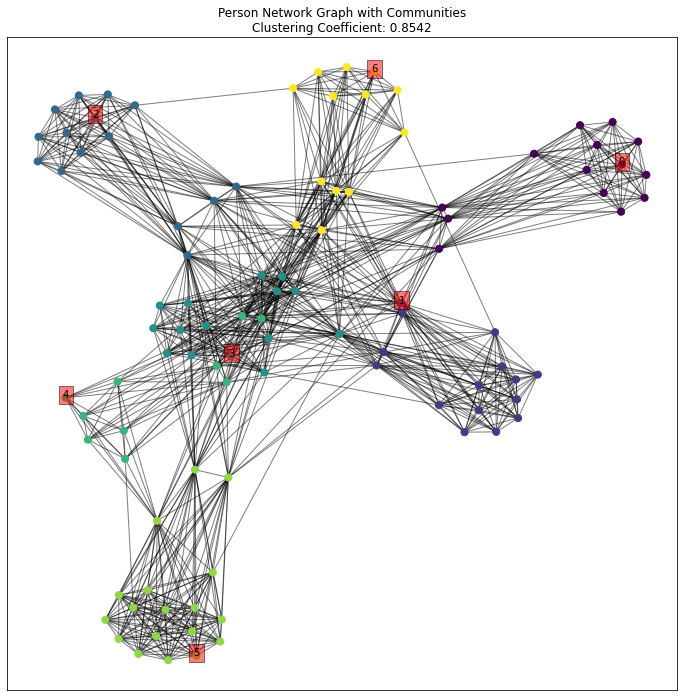

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Load data
file_path = 'combined.txt'  
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization'])

# Only consider data for the first 100 persons
df_sample = df[df['person'].isin(df['person'].unique()[:100])]

# Create a bipartite graph
B = nx.Graph()
persons = df_sample['person'].unique()
organizations = df_sample['organization'].unique()
B.add_nodes_from(persons, bipartite=0)
B.add_nodes_from(organizations, bipartite=1)

# Add edges
edges = list(zip(df_sample['person'], df_sample['organization']))
B.add_edges_from(edges)

# Project the bipartite graph to a unipartite graph (only including person nodes)
persons_graph = nx.bipartite.weighted_projected_graph(B, persons)

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(persons_graph)
print(f"Clustering Coefficient: {clustering_coefficient}")

# Detect communities using the Louvain algorithm
partition = community_louvain.best_partition(persons_graph)

# Print each community's members and central node
communities = {}
community_centers = {}
for person, community in partition.items():
    if community not in communities:
        communities[community] = []
    communities[community].append(person)

for community, members in communities.items():
    # Calculate degree centrality for each community
    subgraph = persons_graph.subgraph(members)
    degree_centrality = nx.degree_centrality(subgraph)
    # Identify the node with the highest degree centrality, the center of the community
    center = max(degree_centrality, key=degree_centrality.get)
    community_centers[community] = center
    print(f"Community {community}:")
    print(f" Members: {members}")
    print(f" Center: {center}\n")

# Assign a color to each node based on community
community_colors = [partition[node] for node in persons_graph.nodes()]

# Draw the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(persons_graph)
nx.draw_networkx_nodes(persons_graph, pos, node_size=50, cmap=plt.get_cmap('viridis'), node_color=community_colors)
nx.draw_networkx_edges(persons_graph, pos, alpha=0.5)

# Add community number labels
for community, center in community_centers.items():
    x, y = pos[center]
    plt.text(x, y, str(community), bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')

plt.title(f"Person Network Graph with Communities\nClustering Coefficient: {clustering_coefficient:.4f}")
plt.show()


# 8. Gender and race analysis

g_e
f-A    0.000000
f-B    0.124031
f-L    0.227273
f-M    0.000000
f-W    0.424560
m-A    0.146970
m-B    0.200068
m-L    0.100483
m-M    0.230769
m-W    0.922142
dtype: float64


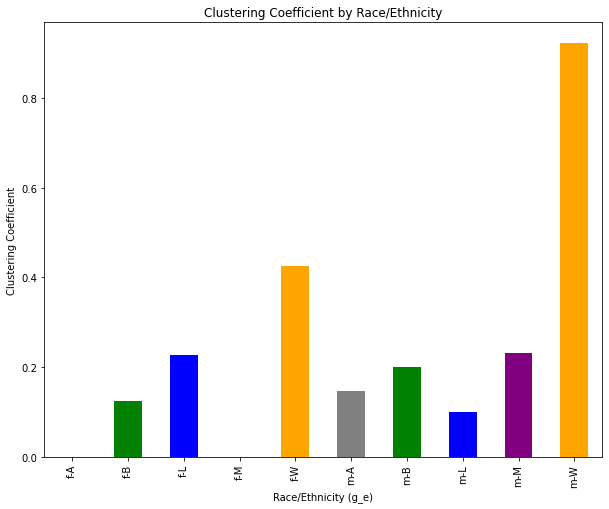

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
file_path = 'combined.txt'  # Update to the actual path of the file
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization', 'g_e'])

# Define a function to calculate the clustering coefficient
def calculate_clustering_coefficient(group_df):
    B = nx.Graph()
    persons = group_df['person'].unique()
    organizations = group_df['organization'].unique()
    B.add_nodes_from(persons, bipartite=0)
    B.add_nodes_from(organizations, bipartite=1)
    edges = list(zip(group_df['person'], group_df['organization']))
    B.add_edges_from(edges)
    persons_graph = nx.bipartite.weighted_projected_graph(B, persons)
    return nx.average_clustering(persons_graph)

# Group by race/ethnicity and calculate the clustering coefficient
grouped = df.groupby('g_e')
clustering_coefficients = grouped.apply(calculate_clustering_coefficient)

# Print the clustering coefficients for different races/ethnicities
print(clustering_coefficients)

# Custom color mapping, assign colors based on race/ethnicity
color_map = {'A': 'grey', 'B': 'green', 'L': 'blue', 'M': 'purple', 'W': 'orange'}
colors = [color_map.get(x[-1], 'gray') for x in clustering_coefficients.index]
filenamegen='gender.png'
# Plot the bar chart of clustering coefficients for different races/ethnicities
clustering_coefficients.plot(kind='bar', figsize=(10, 8), color=colors)
plt.title('Clustering Coefficient by Race/Ethnicity')
plt.savefig(filenamegen)
plt.xlabel('Race/Ethnicity (g_e)')
plt.ylabel('Clustering Coefficient')
plt.show()


## 8.1 Coefficient clustering of race

race
A    0.134988
B    0.263159
L    0.127339
M    0.333333
W    0.921370
dtype: float64


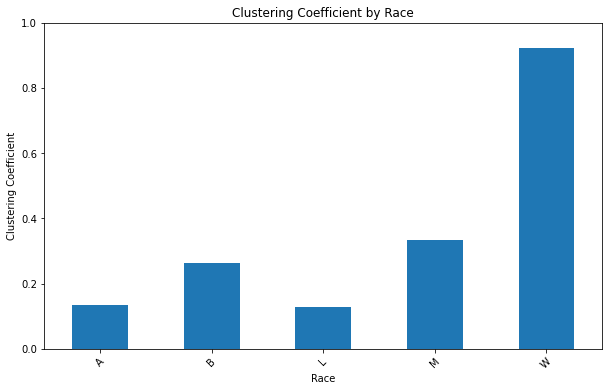

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
file_path = 'combined.txt'  # Update to the actual path of the file
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1', usecols=['person', 'organization', 'g_e'])

# Extract race information (remove gender prefix)
df['race'] = df['g_e'].str[2:]

# Define a function to calculate the clustering coefficient
def calculate_clustering_coefficient(group_df):
    B = nx.Graph()
    persons = group_df['person'].unique()
    organizations = group_df['organization'].unique()
    B.add_nodes_from(persons, bipartite=0)
    B.add_nodes_from(organizations, bipartite=1)
    edges = list(zip(group_df['person'], group_df['organization']))
    B.add_edges_from(edges)
    persons_graph = nx.bipartite.weighted_projected_graph(B, persons)
    return nx.average_clustering(persons_graph)

# Group by race and calculate the clustering coefficient
grouped = df.groupby('race')
clustering_coefficients = grouped.apply(calculate_clustering_coefficient)

# Print the clustering coefficients for different races
print(clustering_coefficients)

# Plot the bar chart of clustering coefficients for different races
clustering_coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Clustering Coefficient by Race')
plt.xlabel('Race')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Clustering coefficients range from 0 to 1
plt.show()
